In [ ]:
import json

In [ ]:
import urllib

In [ ]:
import csv

In [ ]:
import pandas as pd

In [ ]:
import requests

In [ ]:
from datetime import date

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
import theano.tensor as tt
from matplotlib import gridspec
%matplotlib inline

In [ ]:
result = requests.get('https://api.covidactnow.org/v2/states.timeseries.json?apiKey=1540d77cf9a0422b88a2d90e989bbd23')

In [ ]:
result.status_code

In [ ]:
state_json = result.json()

In [ ]:
state_str = json.dumps(state_json,indent=2)

In [ ]:
state_json

In [ ]:
type(state_json)

In [ ]:
state_json[0]

In [ ]:
state_json[1]

In [ ]:
for state_summary in state_json:
     metric=pd.DataFrame(state_summary['metricsTimeseries'])        

In [ ]:
(metric)

In [ ]:
if state_summary['metricsTimeseries']:
    metrics=pd.DataFrame(metric[['date','testPositivityRatio','caseDensity','contactTracerCapacityRatio','infectionRate','infectionRateCI90','icuHeadroomRatio','icuCapacityRatio']])

In [ ]:
metrics['month-year'] = metrics['date'].str.slice(0,7)

In [ ]:
metrics.groupby('month-year').mean()

In [ ]:
for state_summary in state_json:
     actual=pd.DataFrame(state_summary['actualsTimeseries'])        

In [ ]:
if state_summary['actualsTimeseries']:
    actuals=pd.DataFrame(actual[['date','cases','deaths','positiveTests','negativeTests','newCases','newDeaths']])

In [ ]:
actuals['month-year'] = actual['date'].str.slice(0,4)
actuals

In [ ]:
actuals.groupby('month-year').mean()

In [ ]:
save_metrics = []

In [ ]:
save_actuals = []
actual_df = []

In [ ]:
def get_metrics():
    state_json = result.json()
    for state_summary in state_json:
        metrics=pd.DataFrame(state_summary['metricsTimeseries']) 
        metrics['month-year'] = metrics['date'].str.slice(0,7)
        state=state_summary['state']
        state_metric = metrics.groupby('month-year').sum()
        state_metric['state']=state
        print(state_metric)
        save_metrics.append(state_metric)
     

In [ ]:
get_metrics()


In [ ]:
save_metrics

In [ ]:
 state_summary

In [ ]:
def get_actuals():
    state_json = result.json()
    for state_summary in state_json:
        actuals=pd.DataFrame(state_summary['actualsTimeseries']) 
        actuals['month-year'] = actuals['date'].str.slice(0,7)
        actuals['month']=actuals['month-year'].str.slice(5,7)
        actuals['year']=actuals['month-year'].str.slice(0,4)
        state=state_summary['state']
        month=actuals['month']
        year=actuals['year']
        #print(actuals)
        state_actual = (actuals.groupby(['month-year']).sum().reset_index()[['month-year','cases','positiveTests','negativeTests','contactTracers','newCases','newDeaths','vaccinesDistributed','vaccinationsInitiated','vaccinationsCompleted','vaccinesAdministered']])
        state_actual['state']=state
        #state_actual['month']=month
        #state_actual['year']=year
        #state_actual = state_actual.reindex(columns=["month-year","month","year","cases","state"])
        print(state_actual)
        save_actuals.append(state_actual)

In [ ]:
get_actuals()

In [ ]:
save_actuals

In [ ]:
for actual_df_temp in save_actuals:
    actual_df_2=pd.DataFrame(actual_df_temp) 
    actual_df = pd.DataFrame(actual_df).append(actual_df_2)
    print(actual_df)

In [ ]:
type(actual_df)

In [ ]:
actual_df.dtypes

In [ ]:
actual_df.to_csv('Actuals_All_State.csv', index=False)

In [ ]:
actual_df.info()

In [163]:
all_state_ts_df = pd.read_csv("https://api.covidactnow.org/v2/states.timeseries.csv?apiKey=1540d77cf9a0422b88a2d90e989bbd23")
all_state_ts_df.info()
all_state_ts_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25933 entries, 0 to 25932
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    25933 non-null  object 
 1   country                                 25933 non-null  object 
 2   state                                   25933 non-null  object 
 3   county                                  0 non-null      float64
 4   fips                                    25933 non-null  int64  
 5   lat                                     0 non-null      float64
 6   long                                    0 non-null      float64
 7   locationId                              25933 non-null  object 
 8   actuals.cases                           25505 non-null  float64
 9   actuals.deaths                          25529 non-null  float64
 10  actuals.positiveTests                   25042 non-null  fl

date country state  county  fips  lat  long          locationId  \
0  2020-03-01      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
1  2020-03-02      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
2  2020-03-03      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
3  2020-03-04      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
4  2020-03-05      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   

   actuals.cases  actuals.deaths  ...  metrics.infectionRate  \
0            NaN             NaN  ...                    NaN   
1            NaN             NaN  ...                    NaN   
2            NaN             NaN  ...                    NaN   
3            NaN             NaN  ...                    NaN   
4            NaN             NaN  ...                    NaN   

   metrics.infectionRateCI90  metrics.icuHeadroomRatio  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

   metrics.icuHeadroomDetails  metrics.icuCapacityRatio  riskLevels.overall  \
0                         NaN                       NaN                   0   
1                         NaN                       NaN                   0   
2                         NaN                       NaN                   0   
3                         NaN                       NaN                   0   
4                         NaN                       NaN                   0   

   metrics.vaccinationsInitiatedRatio  metrics.vaccinationsCompletedRatio  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   actuals.newDeaths  actuals.vaccinesAdministered  
0                NaN                           NaN  
1                NaN                           NaN  
2                NaN                           NaN  
3                NaN                           NaN  
4                NaN                           NaN  

[5 rows x 39 columns]

In [164]:
all_state_ts_df_summary=pd.DataFrame(all_state_ts_df[['date','state','fips','actuals.cases','actuals.deaths']])

In [165]:
all_state_ts_df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25933 entries, 0 to 25932
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            25933 non-null  object 
 1   state           25933 non-null  object 
 2   fips            25933 non-null  int64  
 3   actuals.cases   25505 non-null  float64
 4   actuals.deaths  25529 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1013.1+ KB


In [167]:
all_state_ts_df_summary['month-year']=all_state_ts_df_summary['date'].str.slice(0,7)

In [168]:
#all_state_ts_df_summary=all_state_ts_df_summary[all_state_ts_df_summary.state in [('AK','AL')]]

In [ ]:
all_state_ts_df_summary_cases=pd.DataFrame(all_state_ts_df_summary.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])

In [ ]:
all_state_ts_df_summary_cases

In [ ]:
import plotnine

In [ ]:
from plotnine import ggplot, aes

In [ ]:
barplot=ggplot(data=all_state_ts_df_summary_cases, mapping=aes(x='month-year',y='actuals.cases',fill='state'))

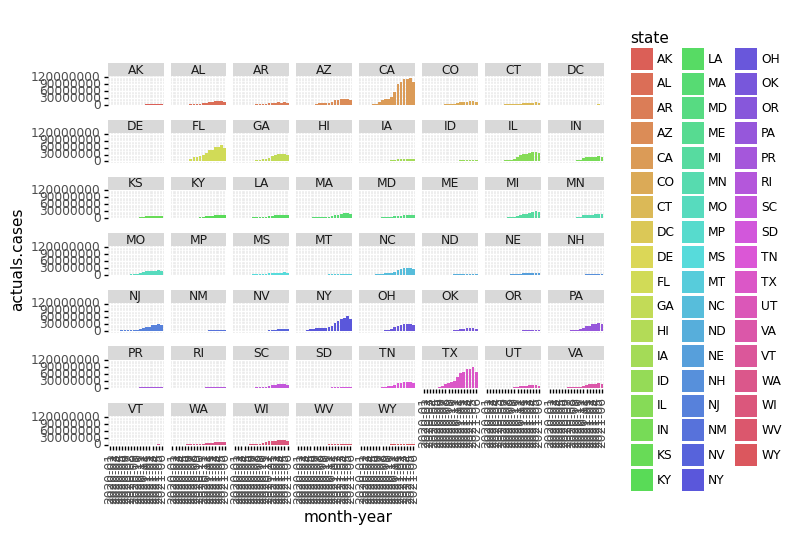

<ggplot: (124259001230)>

In [150]:
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))

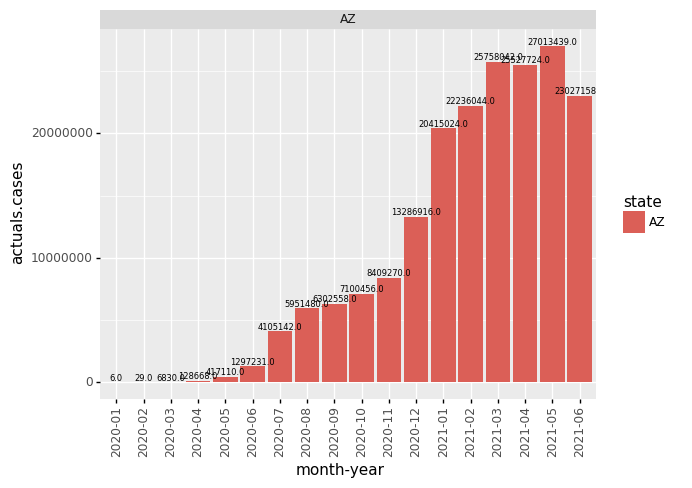

<ggplot: (124261238550)>

In [241]:
all_state_ts_df_summary_cases_AZ=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('AZ')]
all_state_ts_df_summary_cases_AZ=pd.DataFrame(all_state_ts_df_summary_cases_AZ.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_AZ, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

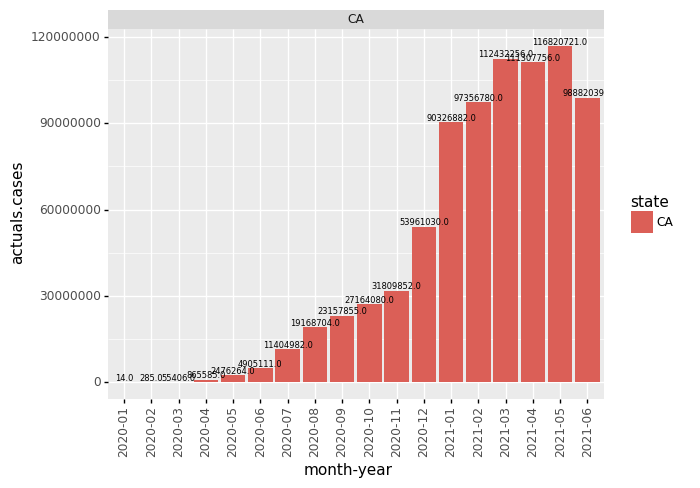

<ggplot: (124256759068)>

In [242]:
all_state_ts_df_summary_cases_CA=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('CA')]
all_state_ts_df_summary_cases_CA=pd.DataFrame(all_state_ts_df_summary_cases_CA.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_CA, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

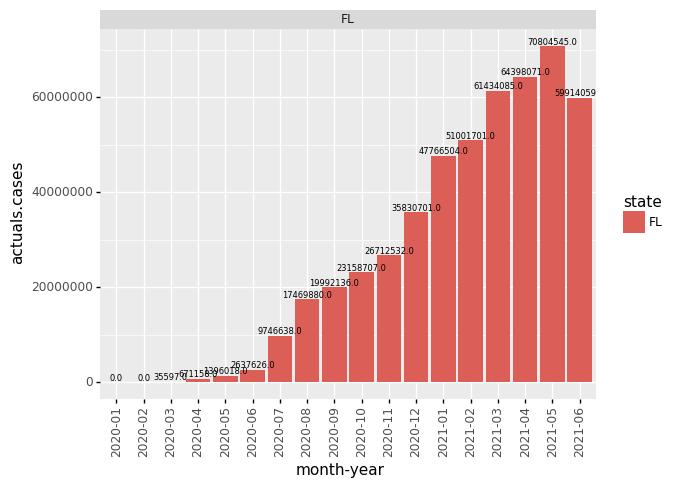

<ggplot: (124261421755)>

In [244]:
all_state_ts_df_summary_cases_FL=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('FL')]
all_state_ts_df_summary_cases_FL=pd.DataFrame(all_state_ts_df_summary_cases_FL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_FL, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

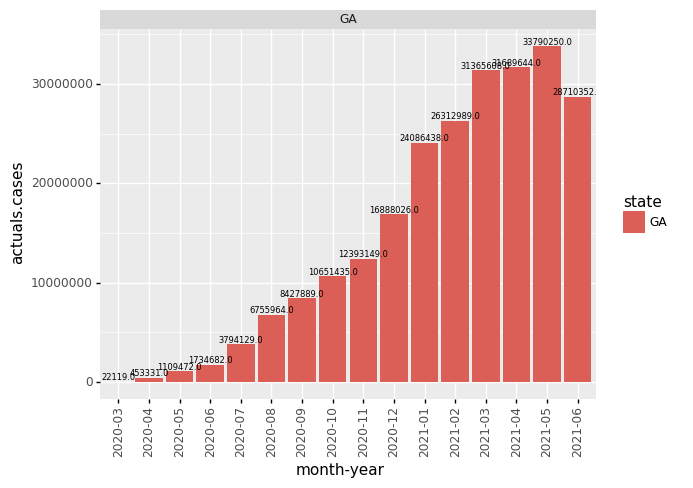

<ggplot: (124258901267)>

In [245]:
all_state_ts_df_summary_cases_GA=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('GA')]
all_state_ts_df_summary_cases_GA=pd.DataFrame(all_state_ts_df_summary_cases_GA.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_GA, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

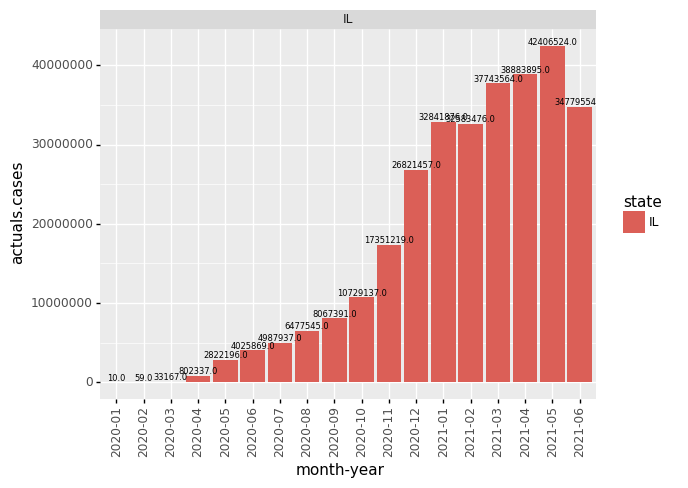

<ggplot: (124261425547)>

In [246]:
all_state_ts_df_summary_cases_IL=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('IL')]
all_state_ts_df_summary_cases_IL=pd.DataFrame(all_state_ts_df_summary_cases_IL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_IL, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

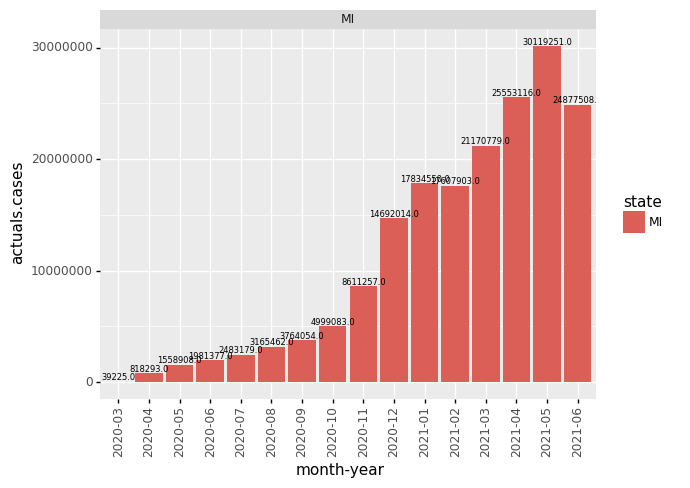

<ggplot: (124261831596)>

In [249]:
all_state_ts_df_summary_cases_MI=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('MI')]
all_state_ts_df_summary_cases_MI=pd.DataFrame(all_state_ts_df_summary_cases_MI.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_MI, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

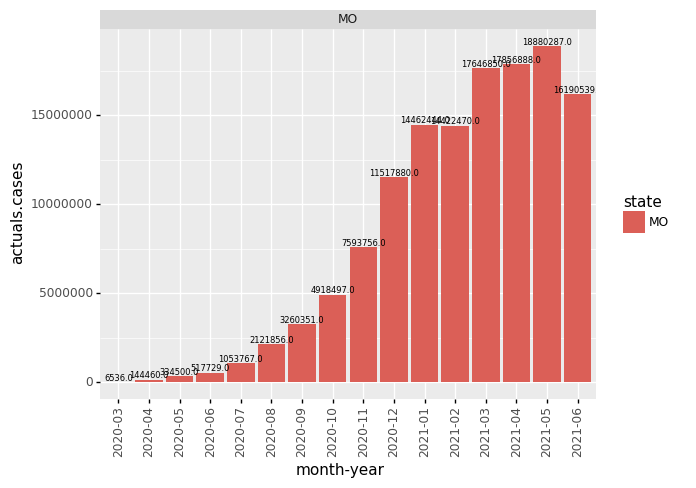

<ggplot: (124256984254)>

In [251]:
all_state_ts_df_summary_cases_MO=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('MO')]
all_state_ts_df_summary_cases_MO=pd.DataFrame(all_state_ts_df_summary_cases_MO.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_MO, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

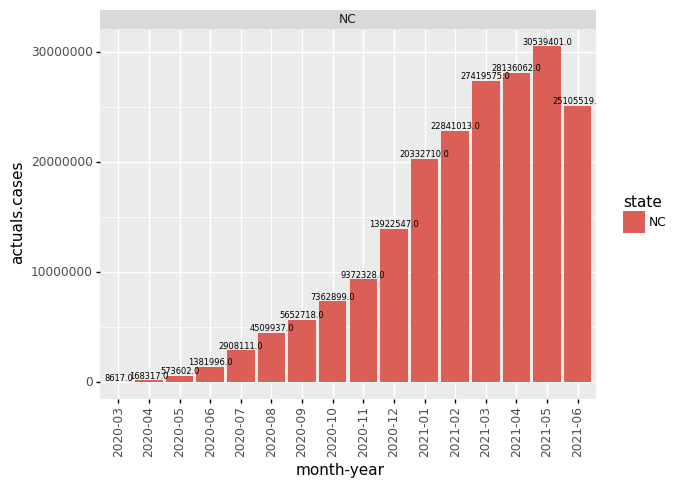

<ggplot: (124259541050)>

In [247]:
all_state_ts_df_summary_cases_NC=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('NC')]
all_state_ts_df_summary_cases_NC=pd.DataFrame(all_state_ts_df_summary_cases_NC.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_NC, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

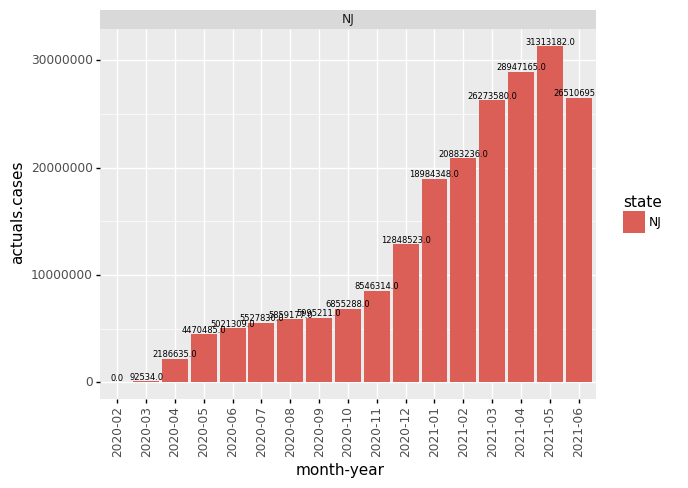

<ggplot: (124259123703)>

In [248]:
all_state_ts_df_summary_cases_NJ=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('NJ')]
all_state_ts_df_summary_cases_NJ=pd.DataFrame(all_state_ts_df_summary_cases_NJ.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_NJ, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

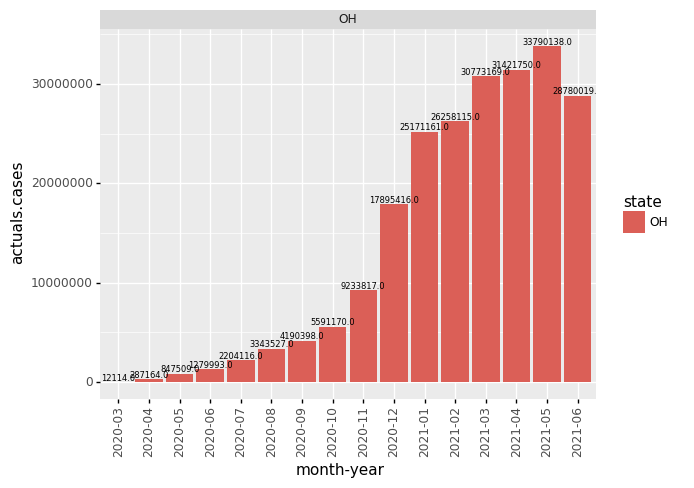

<ggplot: (124259550648)>

In [252]:
all_state_ts_df_summary_cases_OH=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('OH')]
all_state_ts_df_summary_cases_OH=pd.DataFrame(all_state_ts_df_summary_cases_OH.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_OH, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

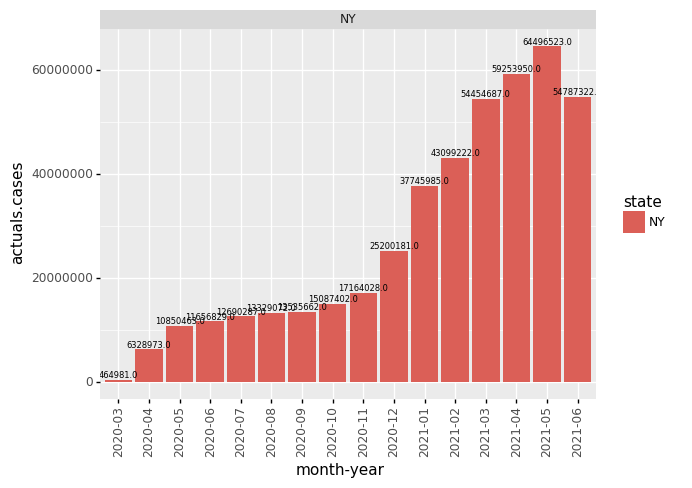

<ggplot: (124257030777)>

In [253]:
all_state_ts_df_summary_cases_NY=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('NY')]
all_state_ts_df_summary_cases_NY=pd.DataFrame(all_state_ts_df_summary_cases_NY.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_NY, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

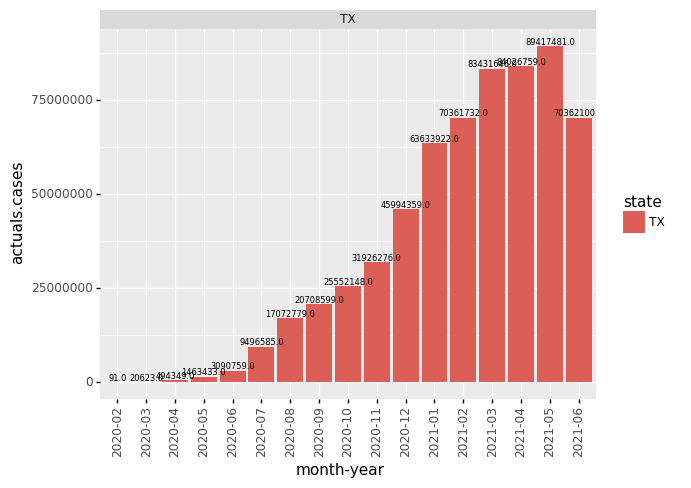

<ggplot: (124261253629)>

In [254]:
all_state_ts_df_summary_cases_TX=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('TX')]
all_state_ts_df_summary_cases_TX=pd.DataFrame(all_state_ts_df_summary_cases_TX.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_TX, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

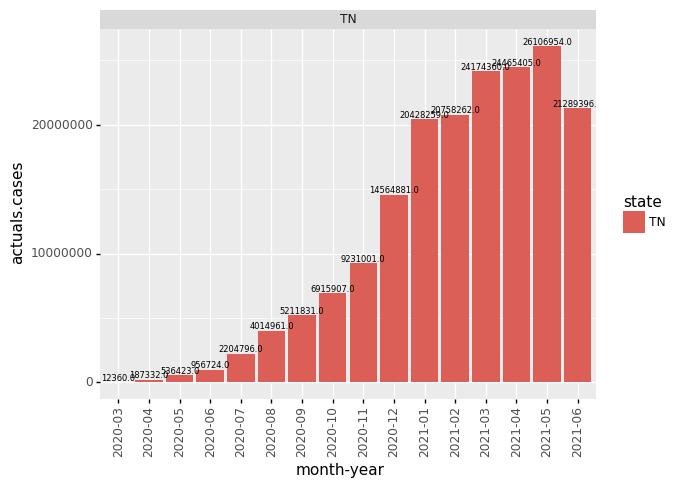

<ggplot: (124261127452)>

In [255]:
all_state_ts_df_summary_cases_TN=all_state_ts_df_summary_cases[all_state_ts_df_summary_cases.state == ('TN')]
all_state_ts_df_summary_cases_TN=pd.DataFrame(all_state_ts_df_summary_cases_TN.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_TN, mapping=aes(x='month-year',y='actuals.cases',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.cases'),stat='sum',nudge_y=0.3,size=6,va='bottom')

In [176]:
all_state_ts_df_summary_deaths=pd.DataFrame(all_state_ts_df_summary.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
all_state_ts_df_summary_deaths

month-year state  actuals.deaths
0      2020-03    AK             8.0
1      2020-04    AK           173.0
2      2020-05    AK           243.0
3      2020-06    AK           291.0
4      2020-07    AK           496.0
..         ...   ...             ...
866    2021-02    WY         18153.0
867    2021-03    WY         21393.0
868    2021-04    WY         21091.0
869    2021-05    WY         22099.0
870    2021-06    WY         18947.0

[871 rows x 3 columns]

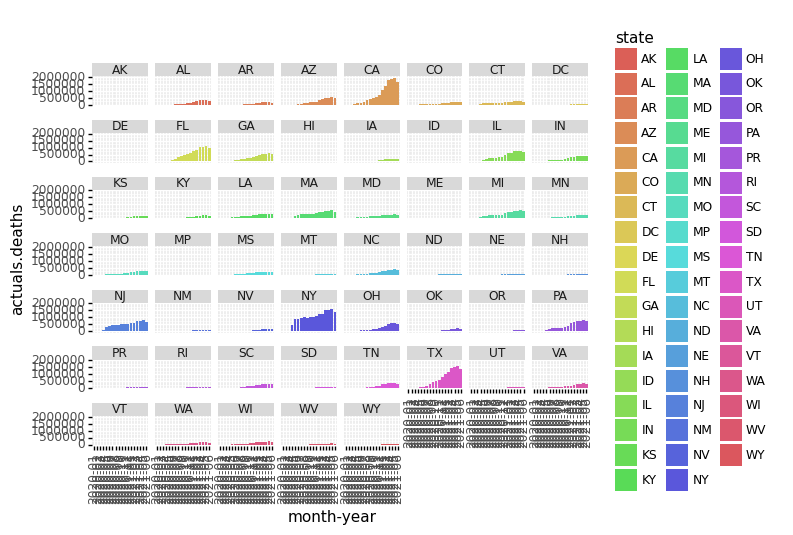

<ggplot: (124257386358)>

In [257]:
barplot=ggplot(data=all_state_ts_df_summary_deaths, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))

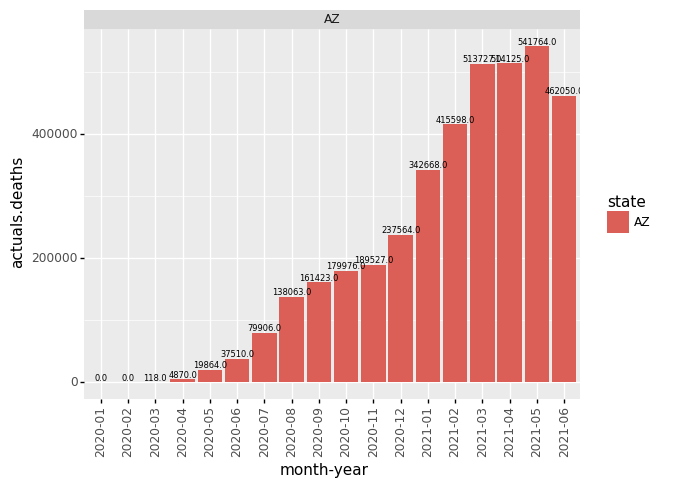

<ggplot: (124256901352)>

In [258]:
all_state_ts_df_summary_deaths_AZ=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('AZ')]
all_state_ts_df_summary_deaths_AZ=pd.DataFrame(all_state_ts_df_summary_deaths_AZ.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_AZ, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

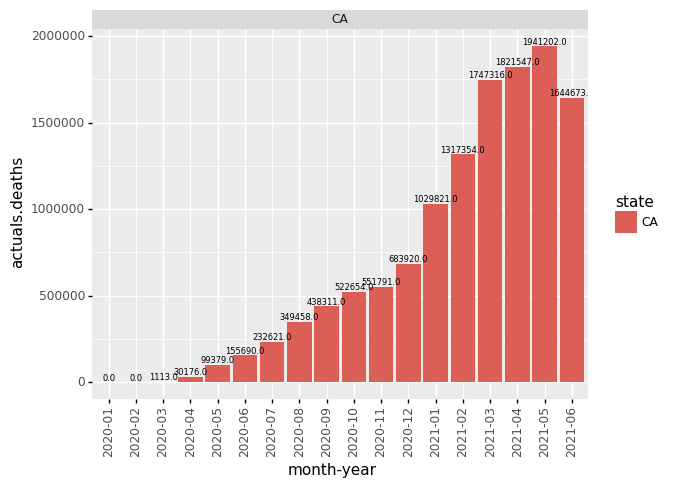

<ggplot: (124261181413)>

In [259]:
all_state_ts_df_summary_deaths_CA=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('CA')]
all_state_ts_df_summary_deaths_CA=pd.DataFrame(all_state_ts_df_summary_deaths_CA.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_CA, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')


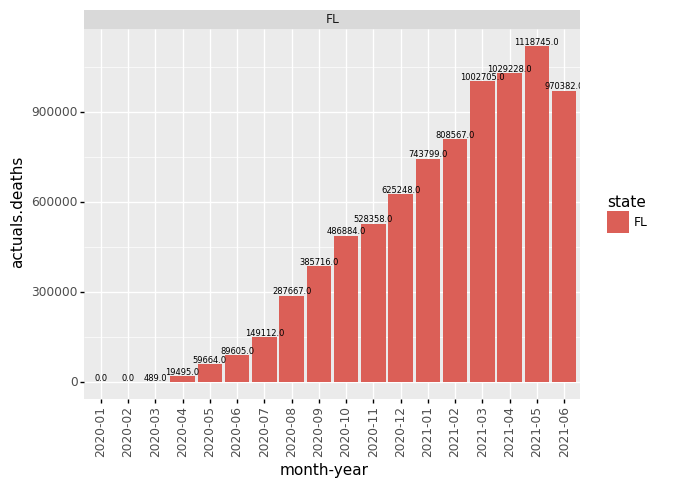

<ggplot: (124259833971)>

In [260]:
all_state_ts_df_summary_deaths_FL=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('FL')]
all_state_ts_df_summary_deaths_FL=pd.DataFrame(all_state_ts_df_summary_deaths_FL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_FL, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

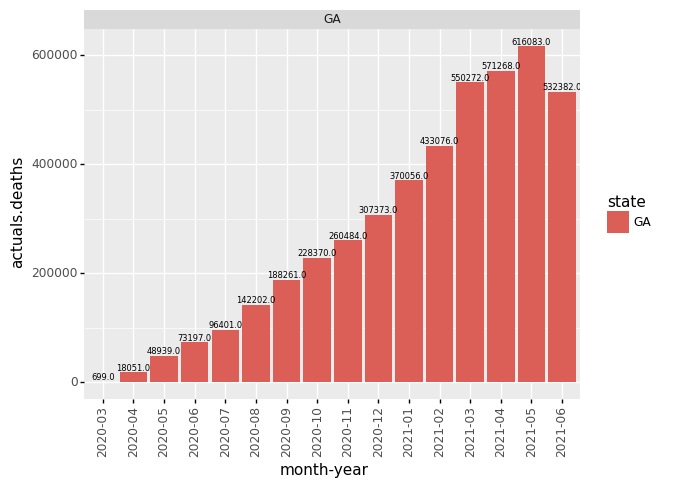

<ggplot: (124259691677)>

In [261]:
all_state_ts_df_summary_deaths_GA=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('GA')]
all_state_ts_df_summary_deaths_GA=pd.DataFrame(all_state_ts_df_summary_deaths_GA.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_GA, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

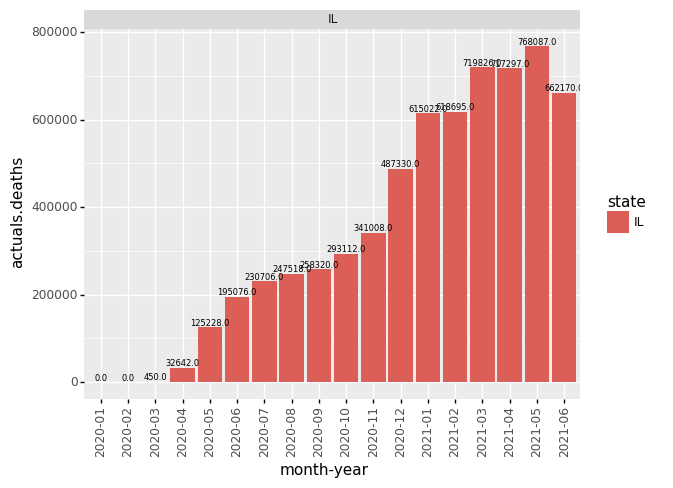

<ggplot: (124259469174)>

In [262]:
all_state_ts_df_summary_deaths_IL=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('IL')]
all_state_ts_df_summary_deaths_IL=pd.DataFrame(all_state_ts_df_summary_deaths_IL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_IL, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

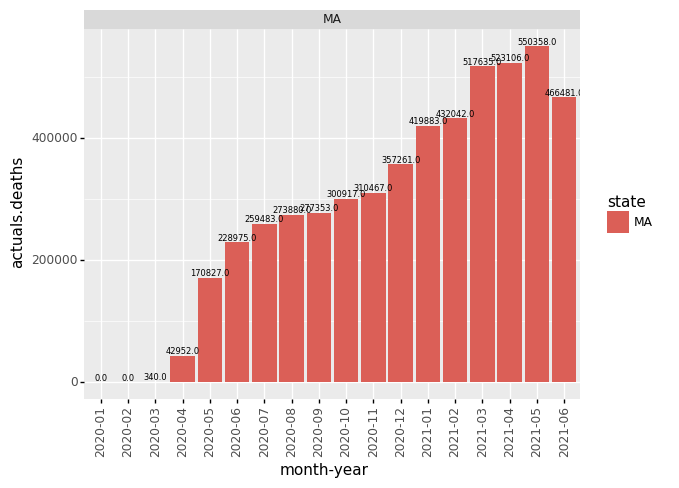

<ggplot: (124259199886)>

In [263]:
all_state_ts_df_summary_deaths_MA=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('MA')]
all_state_ts_df_summary_deaths_MA=pd.DataFrame(all_state_ts_df_summary_deaths_MA.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_MA, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

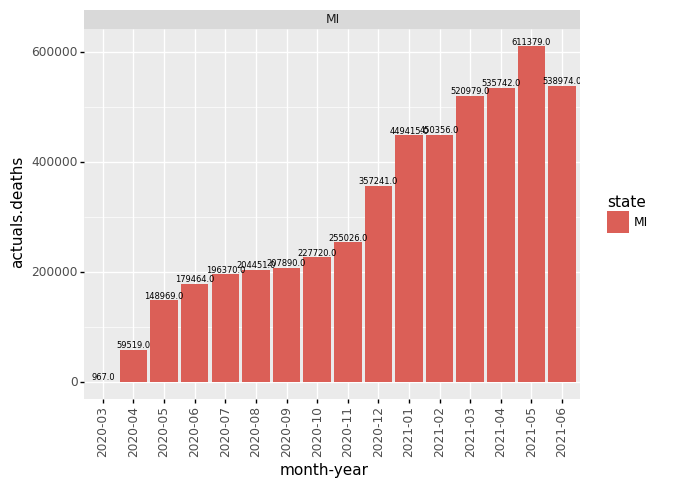

<ggplot: (124258949554)>

In [264]:
all_state_ts_df_summary_deaths_IL=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('MI')]
all_state_ts_df_summary_deaths_IL=pd.DataFrame(all_state_ts_df_summary_deaths_IL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_IL, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

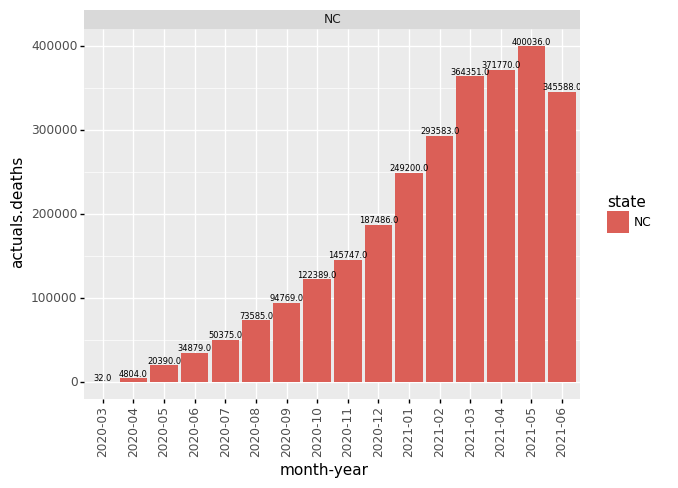

<ggplot: (124254895544)>

In [265]:
all_state_ts_df_summary_deaths_IL=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('NC')]
all_state_ts_df_summary_deaths_IL=pd.DataFrame(all_state_ts_df_summary_deaths_IL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_IL, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

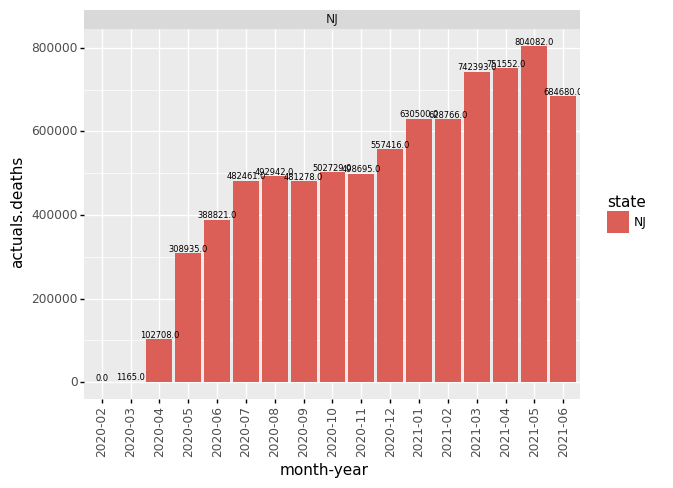

<ggplot: (124255012997)>

In [270]:
all_state_ts_df_summary_deaths_IL=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('NJ')]
all_state_ts_df_summary_deaths_IL=pd.DataFrame(all_state_ts_df_summary_deaths_IL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_IL, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

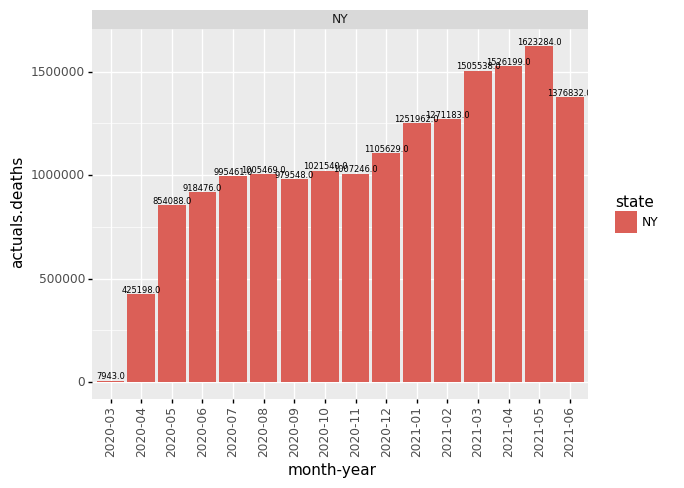

<ggplot: (124259226004)>

In [266]:
all_state_ts_df_summary_deaths_IL=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('NY')]
all_state_ts_df_summary_deaths_IL=pd.DataFrame(all_state_ts_df_summary_deaths_IL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_IL, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

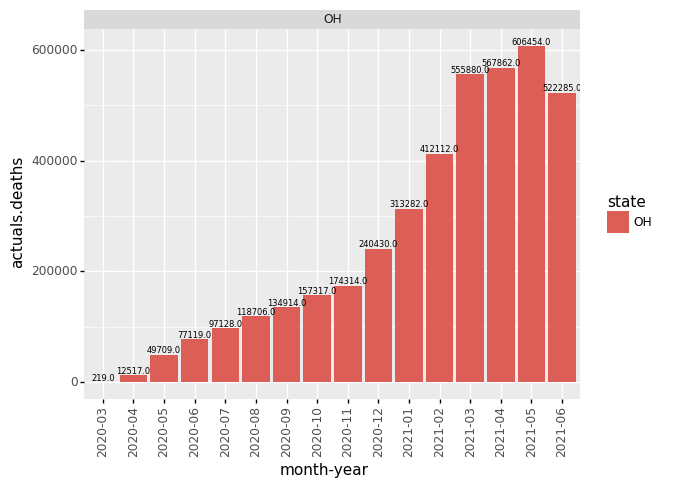

<ggplot: (124255343836)>

In [267]:
all_state_ts_df_summary_deaths_IL=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('OH')]
all_state_ts_df_summary_deaths_IL=pd.DataFrame(all_state_ts_df_summary_deaths_IL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_IL, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

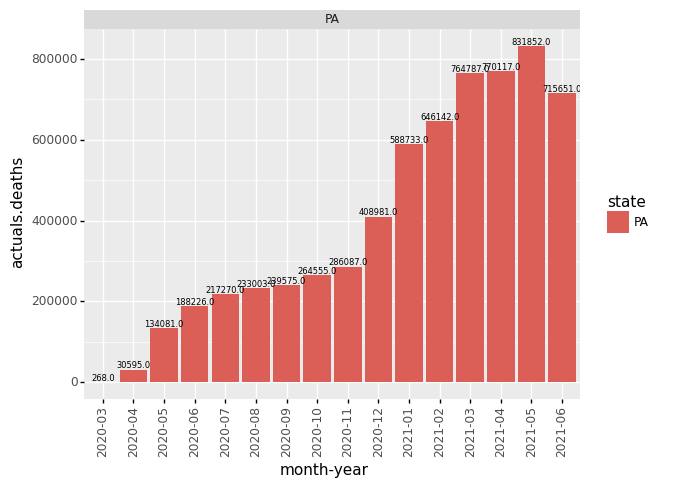

<ggplot: (124259058146)>

In [268]:
all_state_ts_df_summary_deaths_IL=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('PA')]
all_state_ts_df_summary_deaths_IL=pd.DataFrame(all_state_ts_df_summary_deaths_IL.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_IL, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

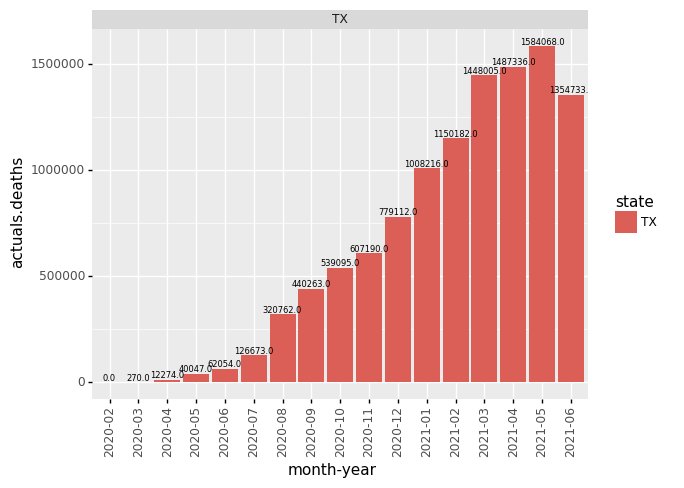

<ggplot: (124262455405)>

In [269]:
all_state_ts_df_summary_deaths_TX=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('TX')]
all_state_ts_df_summary_deaths_TX=pd.DataFrame(all_state_ts_df_summary_deaths_TX.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_TX, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

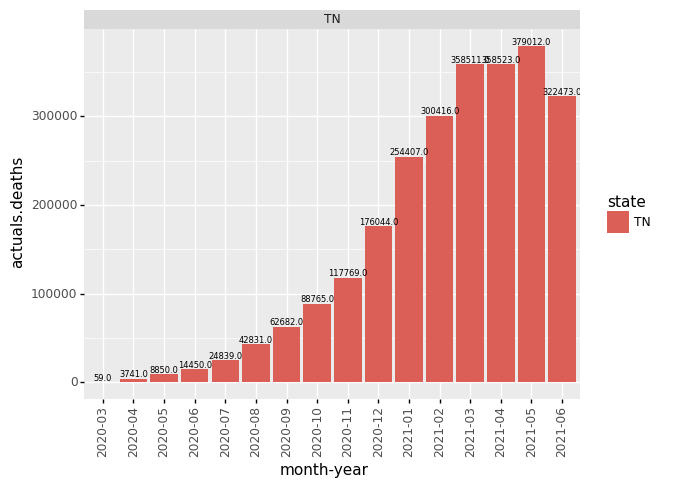

<ggplot: (124259834079)>

In [271]:
all_state_ts_df_summary_deaths_TN=all_state_ts_df_summary_deaths[all_state_ts_df_summary_deaths.state == ('TN')]
all_state_ts_df_summary_deaths_TN=pd.DataFrame(all_state_ts_df_summary_deaths_TN.groupby(['state','month-year']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_TN, mapping=aes(x='month-year',y='actuals.deaths',fill='state'))
barplot+plotnine.geom_col()+plotnine.facets.facet_wrap('state')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='actuals.deaths'),stat='sum',nudge_y=0.3,size=6,va='bottom')

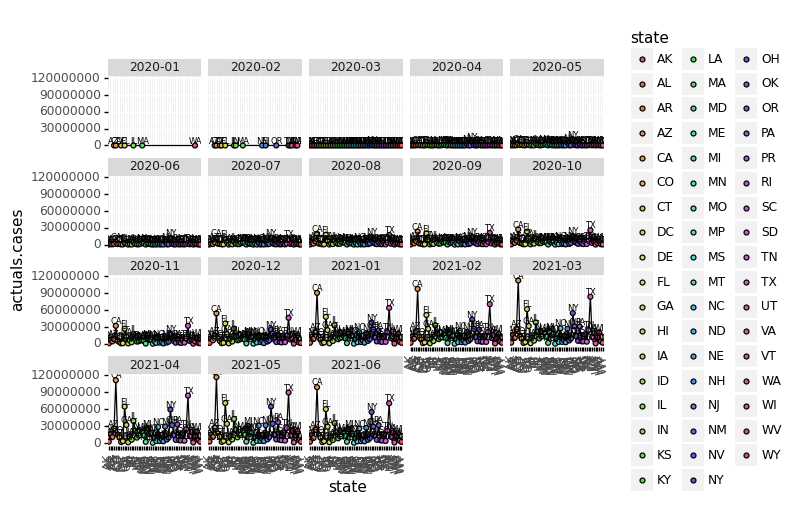

<ggplot: (124257408031)>

In [256]:
all_state_ts_df_summary_cases_dt=pd.DataFrame(all_state_ts_df_summary.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.cases']])
all_state_ts_df_summary_cases_dt
barplot=ggplot(data=all_state_ts_df_summary_cases_dt, mapping=aes(x='state',y='actuals.cases',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

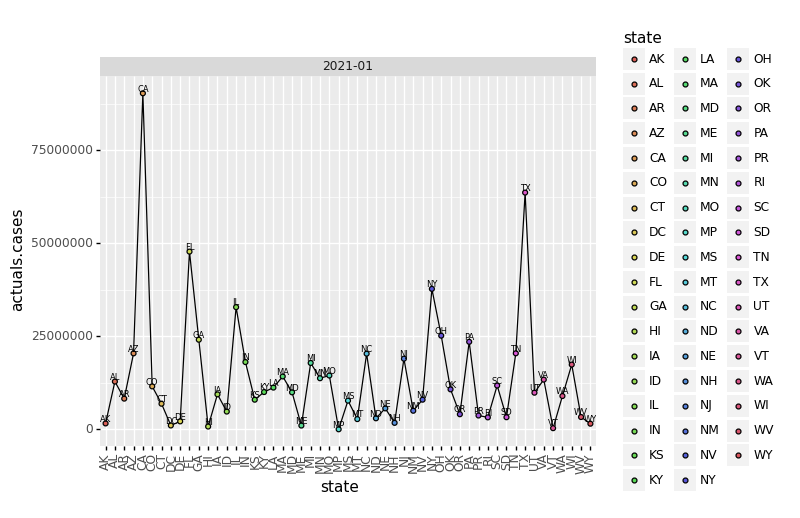

<ggplot: (124254833999)>

In [225]:
all_state_ts_df_summary_cases_dt_01_2021=all_state_ts_df_summary_cases_dt[all_state_ts_df_summary_cases_dt['month-year'] == ('2021-01')]
all_state_ts_df_summary_cases_dt_01_2021=pd.DataFrame(all_state_ts_df_summary_cases_dt_01_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_dt_01_2021, mapping=aes(x='state',y='actuals.cases',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

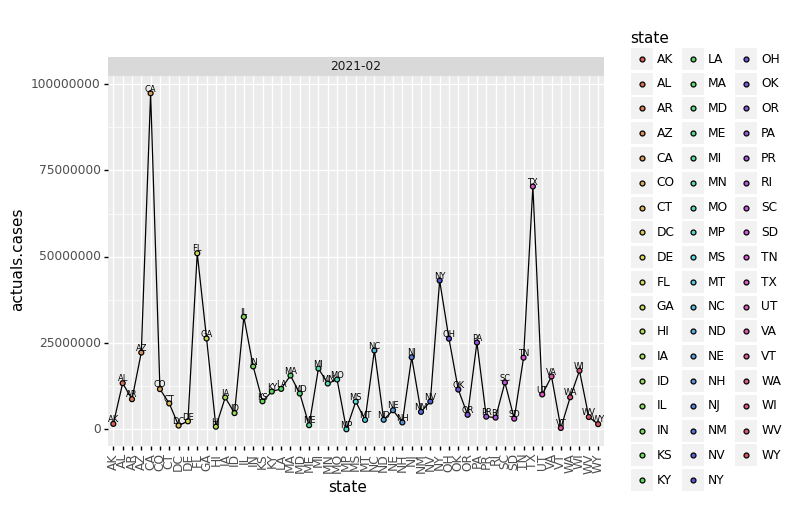

<ggplot: (124259805404)>

In [226]:
all_state_ts_df_summary_cases_dt_02_2021=all_state_ts_df_summary_cases_dt[all_state_ts_df_summary_cases_dt['month-year'] == ('2021-02')]
all_state_ts_df_summary_cases_dt_02_2021=pd.DataFrame(all_state_ts_df_summary_cases_dt_02_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_dt_02_2021, mapping=aes(x='state',y='actuals.cases',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

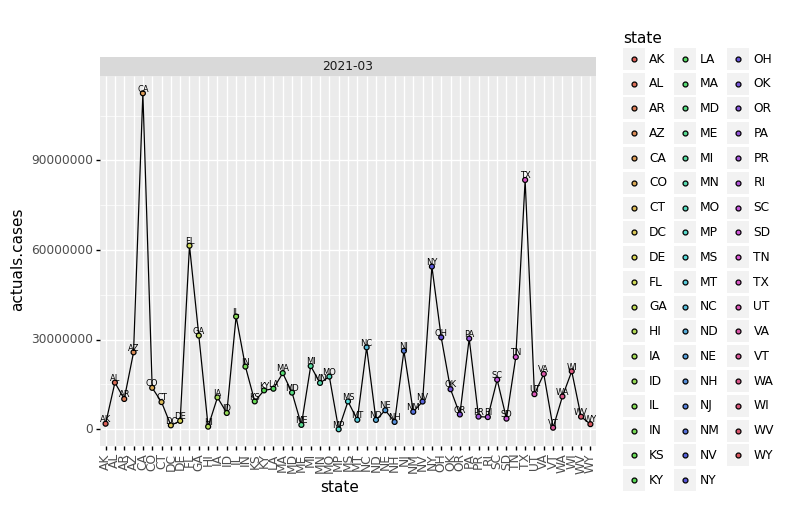

<ggplot: (124259725891)>

In [228]:
all_state_ts_df_summary_cases_dt_03_2021=all_state_ts_df_summary_cases_dt[all_state_ts_df_summary_cases_dt['month-year'] == ('2021-03')]
all_state_ts_df_summary_cases_dt_03_2021=pd.DataFrame(all_state_ts_df_summary_cases_dt_03_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_dt_03_2021, mapping=aes(x='state',y='actuals.cases',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

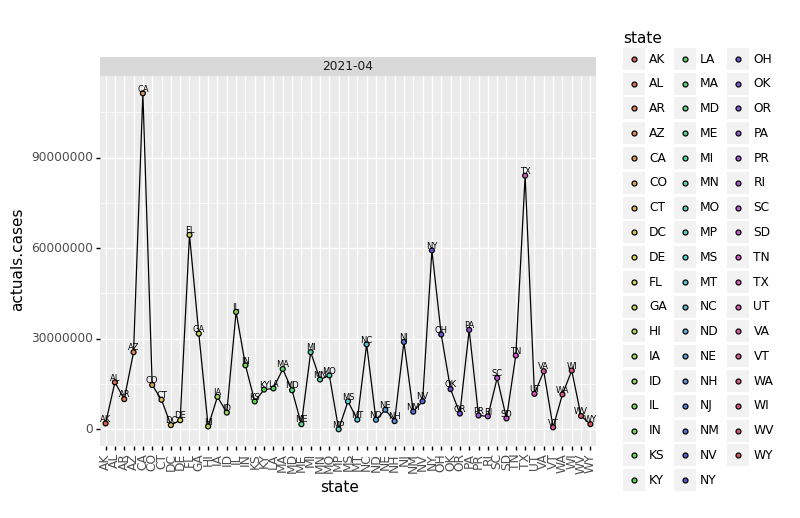

<ggplot: (124261271092)>

In [229]:
all_state_ts_df_summary_cases_dt_04_2021=all_state_ts_df_summary_cases_dt[all_state_ts_df_summary_cases_dt['month-year'] == ('2021-04')]
all_state_ts_df_summary_cases_dt_04_2021=pd.DataFrame(all_state_ts_df_summary_cases_dt_04_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_dt_04_2021, mapping=aes(x='state',y='actuals.cases',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

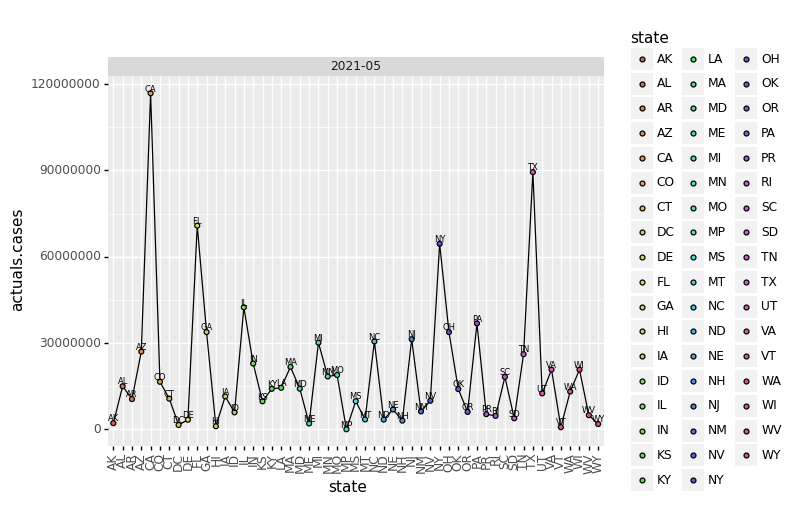

<ggplot: (124253684038)>

In [230]:
all_state_ts_df_summary_cases_dt_05_2021=all_state_ts_df_summary_cases_dt[all_state_ts_df_summary_cases_dt['month-year'] == ('2021-05')]
all_state_ts_df_summary_cases_dt_05_2021=pd.DataFrame(all_state_ts_df_summary_cases_dt_05_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_dt_05_2021, mapping=aes(x='state',y='actuals.cases',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

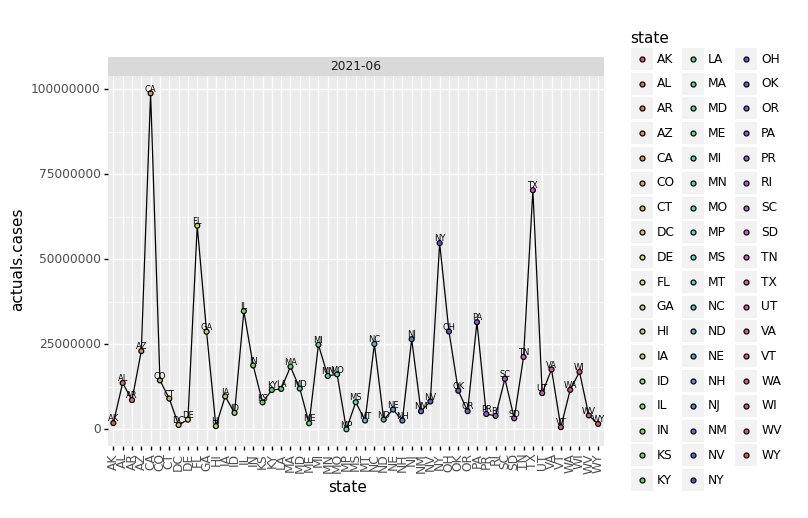

<ggplot: (124258936646)>

In [231]:
all_state_ts_df_summary_cases_dt_06_2021=all_state_ts_df_summary_cases_dt[all_state_ts_df_summary_cases_dt['month-year'] == ('2021-06')]
all_state_ts_df_summary_cases_dt_06_2021=pd.DataFrame(all_state_ts_df_summary_cases_dt_06_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.cases']])
barplot=ggplot(data=all_state_ts_df_summary_cases_dt_06_2021, mapping=aes(x='state',y='actuals.cases',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

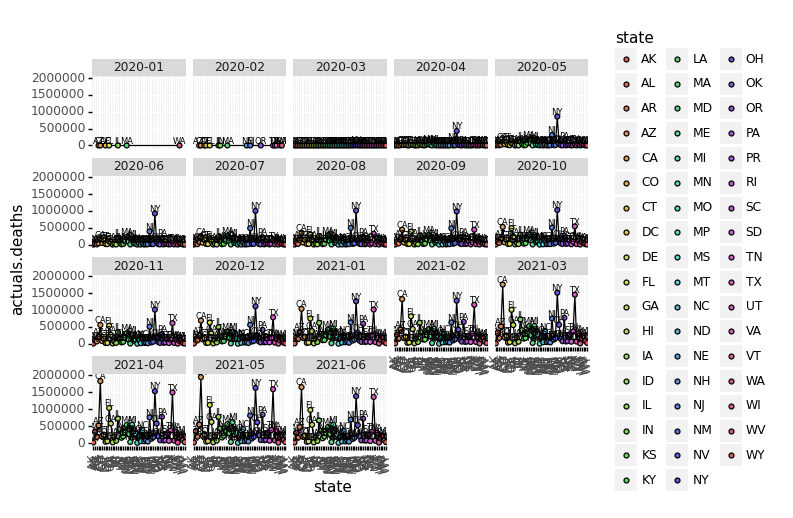

<ggplot: (124261267306)>

In [232]:
all_state_ts_df_summary_deaths_dt=pd.DataFrame(all_state_ts_df_summary.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.deaths']])
all_state_ts_df_summary_deaths_dt
barplot=ggplot(data=all_state_ts_df_summary_deaths_dt, mapping=aes(x='state',y='actuals.deaths',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

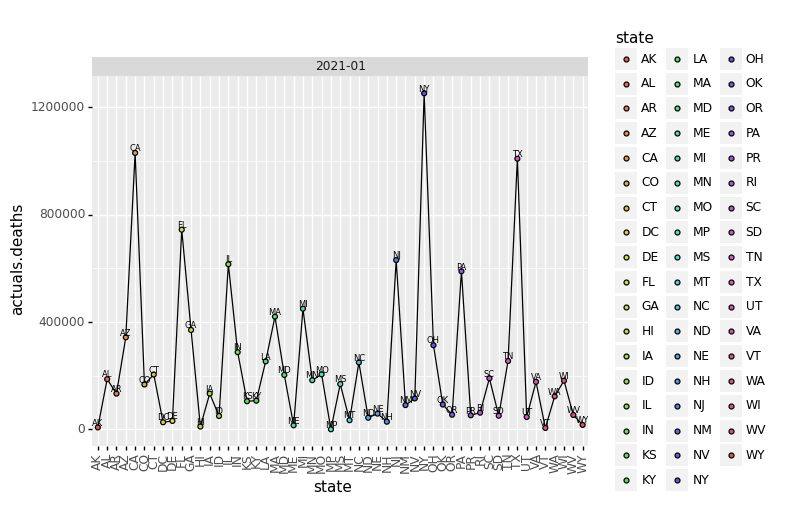

<ggplot: (124257386280)>

In [234]:
all_state_ts_df_summary_deaths_dt_01_2021=all_state_ts_df_summary_deaths_dt[all_state_ts_df_summary_deaths_dt['month-year'] == ('2021-01')]
all_state_ts_df_summary_deaths_dt_01_2021=pd.DataFrame(all_state_ts_df_summary_deaths_dt_01_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_dt_01_2021, mapping=aes(x='state',y='actuals.deaths',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

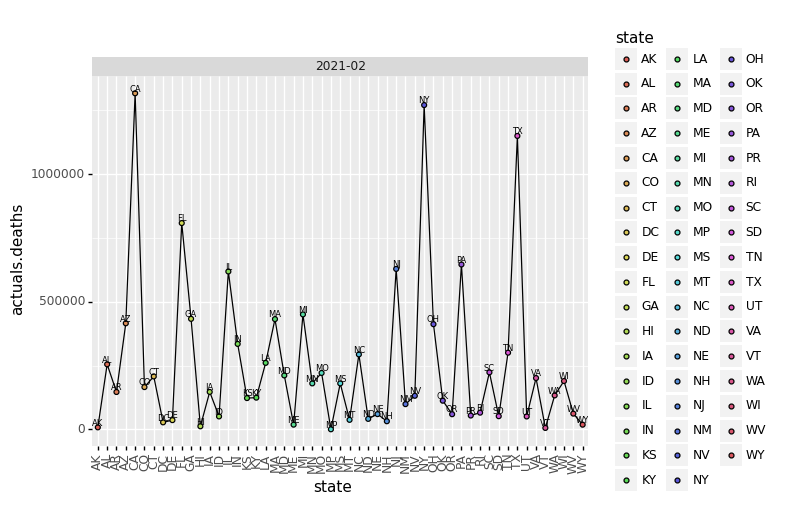

<ggplot: (124254952798)>

In [235]:
all_state_ts_df_summary_deaths_dt_02_2021=all_state_ts_df_summary_deaths_dt[all_state_ts_df_summary_deaths_dt['month-year'] == ('2021-02')]
all_state_ts_df_summary_deaths_dt_02_2021=pd.DataFrame(all_state_ts_df_summary_deaths_dt_02_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_dt_02_2021, mapping=aes(x='state',y='actuals.deaths',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

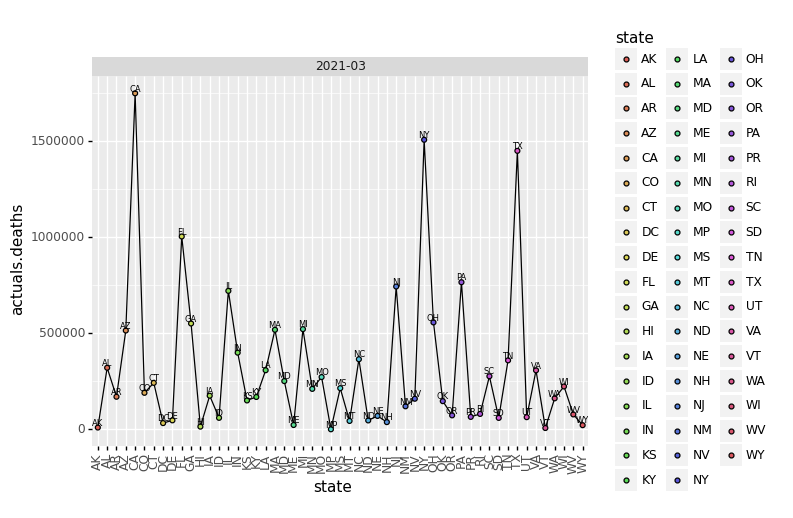

<ggplot: (124259148662)>

In [236]:
all_state_ts_df_summary_deaths_dt_03_2021=all_state_ts_df_summary_deaths_dt[all_state_ts_df_summary_deaths_dt['month-year'] == ('2021-03')]
all_state_ts_df_summary_deaths_dt_03_2021=pd.DataFrame(all_state_ts_df_summary_deaths_dt_03_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_dt_03_2021, mapping=aes(x='state',y='actuals.deaths',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

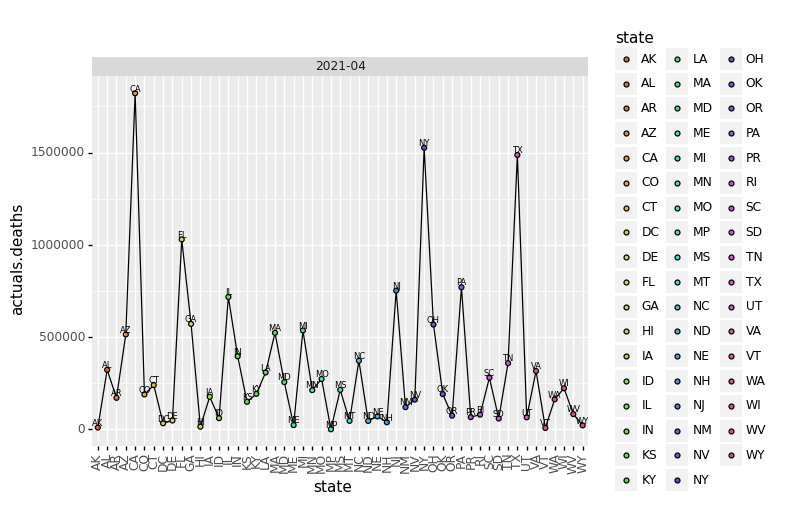

<ggplot: (124256954733)>

In [237]:
all_state_ts_df_summary_deaths_dt_04_2021=all_state_ts_df_summary_deaths_dt[all_state_ts_df_summary_deaths_dt['month-year'] == ('2021-04')]
all_state_ts_df_summary_deaths_dt_04_2021=pd.DataFrame(all_state_ts_df_summary_deaths_dt_04_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_dt_04_2021, mapping=aes(x='state',y='actuals.deaths',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

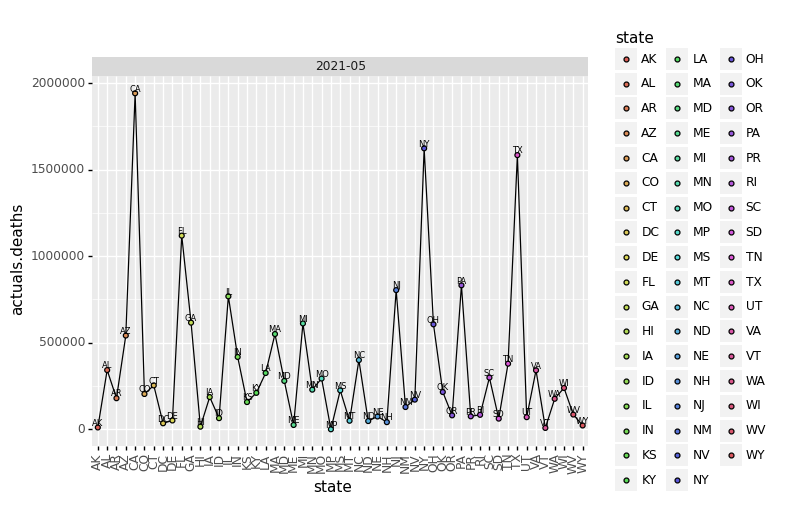

<ggplot: (124257098316)>

In [238]:
all_state_ts_df_summary_deaths_dt_05_2021=all_state_ts_df_summary_deaths_dt[all_state_ts_df_summary_deaths_dt['month-year'] == ('2021-05')]
all_state_ts_df_summary_deaths_dt_05_2021=pd.DataFrame(all_state_ts_df_summary_deaths_dt_05_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_dt_05_2021, mapping=aes(x='state',y='actuals.deaths',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')

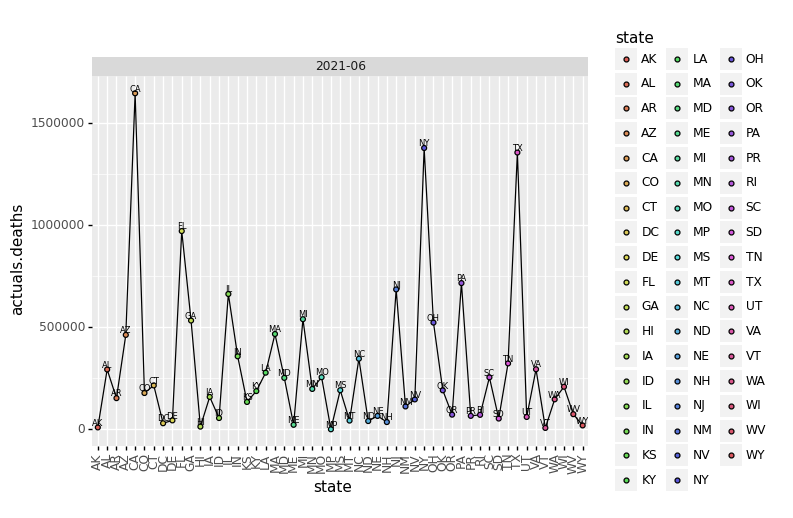

<ggplot: (124254920241)>

In [239]:
all_state_ts_df_summary_deaths_dt_06_2021=all_state_ts_df_summary_deaths_dt[all_state_ts_df_summary_deaths_dt['month-year'] == ('2021-06')]
all_state_ts_df_summary_deaths_dt_06_2021=pd.DataFrame(all_state_ts_df_summary_deaths_dt_06_2021.groupby(['month-year','state']).sum().reset_index()[['month-year','state','actuals.deaths']])
barplot=ggplot(data=all_state_ts_df_summary_deaths_dt_06_2021, mapping=aes(x='state',y='actuals.deaths',fill='state',group = 1))
barplot+plotnine.geom_line()+plotnine.geom_point()+plotnine.facets.facet_wrap('month-year')+plotnine.theme(axis_text_x =plotnine.element_text(rotation=90))+plotnine.geom_text(
     aes(label='state'),
         nudge_y=0.3,
     size=6,
     va='bottom')